<a href="https://colab.research.google.com/github/wa-le/BE-Properties-Regression/blob/master/be_properties.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Goal

The aim is to find patterns in the [Belgian Property Prices 2023](https://www.kaggle.com/datasets/unworried1686/belgian-property-prices-2023) dataset and build a model to predict prices.


In [1]:
# change working directory
%cd /content/drive/MyDrive/Data Projects/Belgium Properties

/content/drive/MyDrive/Data Projects/Belgium Properties


In [2]:
#%pip install pycaret

In [3]:
%pwd

'/content/drive/MyDrive/Data Projects/Belgium Properties'

# Imports and Load dataset

In [4]:
# Data Analysis
import pandas as pd
import numpy as np

# check null values in DF
import missingno

# Charts
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

# ML libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV

In [5]:
# unzip file containing dataset
%%python -c "import zipfile; zip_ref = zipfile.ZipFile('belgian_property_prices.csv.zip', 'r'); zip_ref.extractall('/content/drive/MyDrive/Data Projects/Belgium Properties'); zip_ref.close()"

In [6]:
# Load CSV file
housing_df = pd.read_csv("/content/drive/MyDrive/Data Projects/Belgium Properties/belgian_property_prices.csv")
housing_df.shape

(4770, 54)

In [7]:
housing_df.head(5)

,as_built_plan,available_as_of,basement,bathrooms,bedroom_1_surface,bedroom_2_surface,bedroom_3_surface,bedrooms,building_condition,co2_emission,...,width_of_the_lot_on_the_street,yearly_theoretical_total_energy_consumption,housenumber,street,city,postal,state,lat,lng,price
0,0.0,After signing the deed,1.0,1.0,12.0,10.0,10.0,3.0,Good,9802.0,...,11.0,NaN,30,Stationsstraat,Ronse,9600.0,Vlaams Gewest,50.743367,3.601306,275000
1,0.0,After signing the deed,1.0,1.0,15.0,11.0,11.0,4.0,Good,NaN,...,NaN,NaN,52,Wingenesteenweg,Wingene,8750.0,Vlaams Gewest,51.042146,3.302600,430000
2,NaN,After signing the deed,1.0,3.0,22.0,22.0,22.0,5.0,As new,NaN,...,6.0,NaN,157,Mechelsesteenweg,Antwerpen,2018.0,Vlaams Gewest,51.205030,4.410943,949000
3,0.0,NaN,NaN,3.0,33.0,30.0,23.0,5.0,As new,NaN,...,19.0,NaN,66,Noordzandstraat,Brugge,8000.0,Vlaams Gewest,51.206826,3.219186,2200000
4,0.0,After signing the deed,NaN,NaN,19.0,NaN,NaN,1.0,Just renovated,58.0,...,5.0,24263.0,15,Rue de l'Etoile,Wavre,1301.0,Région Wallonne,50.717062,4.577550,195000


In [8]:
housing_df.head(5).T

,0,1,2,3,4
as_built_plan,0.0,0.0,NaN,0.0,0.0
available_as_of,After signing the deed,After signing the deed,After signing the deed,NaN,After signing the deed
basement,1.0,1.0,1.0,NaN,NaN
bathrooms,1.0,1.0,3.0,3.0,NaN
bedroom_1_surface,12.0,15.0,22.0,33.0,19.0
bedroom_2_surface,10.0,11.0,22.0,30.0,NaN
bedroom_3_surface,10.0,11.0,22.0,23.0,NaN
bedrooms,3.0,4.0,5.0,5.0,1.0
building_condition,Good,Good,As new,As new,Just renovated
co2_emission,9802.0,NaN,NaN,NaN,58.0


# Explore Data

In [9]:
# drop duplicates
housing_df = housing_df.drop_duplicates()
housing_df

,as_built_plan,available_as_of,basement,bathrooms,bedroom_1_surface,bedroom_2_surface,bedroom_3_surface,bedrooms,building_condition,co2_emission,...,width_of_the_lot_on_the_street,yearly_theoretical_total_energy_consumption,housenumber,street,city,postal,state,lat,lng,price
0,0.0,After signing the deed,1.0,1.0,12.0,10.0,10.0,3.0,Good,9802.0,...,11.0,NaN,30,Stationsstraat,Ronse,9600.0,Vlaams Gewest,50.743367,3.601306,275000
1,0.0,After signing the deed,1.0,1.0,15.0,11.0,11.0,4.0,Good,NaN,...,NaN,NaN,52,Wingenesteenweg,Wingene,8750.0,Vlaams Gewest,51.042146,3.302600,430000
2,NaN,After signing the deed,1.0,3.0,22.0,22.0,22.0,5.0,As new,NaN,...,6.0,NaN,157,Mechelsesteenweg,Antwerpen,2018.0,Vlaams Gewest,51.205030,4.410943,949000
3,0.0,NaN,NaN,3.0,33.0,30.0,23.0,5.0,As new,NaN,...,19.0,NaN,66,Noordzandstraat,Brugge,8000.0,Vlaams Gewest,51.206826,3.219186,2200000
4,0.0,After signing the deed,NaN,NaN,19.0,NaN,NaN,1.0,Just renovated,58.0,...,5.0,24263.0,15,Rue de l'Etoile,Wavre,1301.0,Région Wallonne,50.717062,4.577550,195000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4765,1.0,After signing the deed,1.0,2.0,11.0,14.0,15.0,6.0,Good,NaN,...,NaN,NaN,594,Brusselsesteenweg,Asse,1731.0,Vlaams Gewest,50.884192,4.274010,944000
4766,NaN,After signing the deed,1.0,2.0,25.0,20.0,18.0,6.0,To be done up,NaN,...,NaN,NaN,31,Brusselsesteenweg,Zemst,1980.0,Vlaams Gewest,50.985378,4.466114,960000
4767,0.0,NaN,1.0,5.0,NaN,NaN,NaN,9.0,Good,NaN,...,NaN,129394.0,15,Rue de Nazareth,Ath,7800.0,Région Wallonne,50.630171,3.779321,750000
4768,0.0,To be defined,1.0,2.0,NaN,NaN,NaN,3.0,Good,NaN,...,9.0,NaN,8,Orteliuskaai,Antwerpen,2000.0,Vlaams Gewest,51.225206,4.399929,925000


In [10]:
# checking each columns datatype
housing_df.dtypes

as_built_plan                                     float64
available_as_of                                    object
basement                                          float64
bathrooms                                         float64
bedroom_1_surface                                 float64
bedroom_2_surface                                 float64
bedroom_3_surface                                 float64
bedrooms                                          float64
building_condition                                 object
co2_emission                                      float64
cadastral_income                                  float64
connection_to_sewer_network                       float64
construction_year                                 float64
covered_parking_spaces                            float64
dining_room                                       float64
double_glazing                                    float64
energy_class                                       object
external_refer

In [11]:
# checking more info on our data
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4753 entries, 0 to 4769
Data columns (total 54 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   as_built_plan                                   2381 non-null   float64
 1   available_as_of                                 3899 non-null   object 
 2   basement                                        2073 non-null   float64
 3   bathrooms                                       4507 non-null   float64
 4   bedroom_1_surface                               3150 non-null   float64
 5   bedroom_2_surface                               3093 non-null   float64
 6   bedroom_3_surface                               2611 non-null   float64
 7   bedrooms                                        4723 non-null   float64
 8   building_condition                              4470 non-null   object 
 9   co2_emission                             

In [12]:
# General statistics on dataset
housing_df.describe().T

,count,mean,std,min,25%,50%,75%,max
as_built_plan,2381.0,0.061319,0.239965,0.000000,0.000000,0.000000,0.000000,1.000000e+00
basement,2073.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00
bathrooms,4507.0,1.619481,1.109057,1.000000,1.000000,1.000000,2.000000,1.300000e+01
bedroom_1_surface,3150.0,18.344444,27.286463,1.000000,14.000000,16.000000,20.000000,1.492000e+03
bedroom_2_surface,3093.0,16.167798,36.615109,1.000000,12.000000,14.000000,17.000000,1.529000e+03
bedroom_3_surface,2611.0,17.792800,79.881629,1.000000,11.000000,14.000000,17.000000,2.867000e+03
bedrooms,4723.0,3.745924,1.528157,1.000000,3.000000,3.000000,4.000000,2.500000e+01
co2_emission,1927.0,539.125065,2199.065293,1.000000,49.000000,76.000000,116.000000,5.655700e+04
cadastral_income,3679.0,1364.385431,5682.025996,1.000000,567.000000,930.000000,1506.000000,3.369650e+05
connection_to_sewer_network,2021.0,0.927759,0.258951,0.000000,1.000000,1.000000,1.000000,1.000000e+00


In [13]:
housing_df.columns

Index(['as_built_plan', 'available_as_of', 'basement', 'bathrooms',
       'bedroom_1_surface', 'bedroom_2_surface', 'bedroom_3_surface',
       'bedrooms', 'building_condition', 'co2_emission', 'cadastral_income',
       'connection_to_sewer_network', 'construction_year',
       'covered_parking_spaces', 'dining_room', 'double_glazing',
       'energy_class', 'external_reference', 'flood_zone_type', 'furnished',
       'garden_surface', 'gas_water__electricity', 'heating_type',
       'kitchen_surface', 'kitchen_type', 'latest_land_use_designation',
       'living_area', 'living_room_surface', 'number_of_frontages', 'office',
       'outdoor_parking_spaces', 'planning_permission_obtained',
       'possible_priority_purchase_right', 'primary_energy_consumption',
       'proceedings_for_breach_of_planning_regulations',
       'reference_number_of_the_epc_report', 'street_frontage_width',
       'subdivision_permit', 'surface_of_the_plot', 'surroundings_type',
       'tv_cable', 'tenemen

In [14]:
# Select columns that contain only string values
str_cols = housing_df.select_dtypes(include=['object'])

# Check the unique values in the columns
for each in str_cols.columns:
  print(each)
  print(housing_df[each].value_counts().T)
  print("")

available_as_of
After signing the deed     2900
Immediately                 376
To be defined               341
Depending on the tenant     198
At delivery                  84
Name: available_as_of, dtype: int64

building_condition
Good              1959
As new             783
To renovate        693
To be done up      644
Just renovated     321
To restore          70
Name: building_condition, dtype: int64

energy_class
D                877
C                812
F                799
E                742
B                663
G                482
Not specified    193
A                171
A+                11
A++                2
C_B                1
Name: energy_class, dtype: int64

external_reference
D1050-22320          2
5596472              1
5513866              1
5525227              1
5251923              1
                    ..
11553 - 4129         1
5528349              1
4975 - 2459956       1
11715 - 111114987    1
1165 - 474           1
Name: external_reference, Length: 4319, 

In [15]:
housing_df.head(1).T

,0
as_built_plan,0.0
available_as_of,After signing the deed
basement,1.0
bathrooms,1.0
bedroom_1_surface,12.0
bedroom_2_surface,10.0
bedroom_3_surface,10.0
bedrooms,3.0
building_condition,Good
co2_emission,9802.0


In [16]:
housing_df.corr()

<ipython-input-16-efd18c3aa5ce>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  housing_df.corr()


,as_built_plan,basement,bathrooms,bedroom_1_surface,bedroom_2_surface,bedroom_3_surface,bedrooms,co2_emission,cadastral_income,connection_to_sewer_network,...,surface_of_the_plot,tv_cable,tenement_building,toilets,width_of_the_lot_on_the_street,yearly_theoretical_total_energy_consumption,postal,lat,lng,price
as_built_plan,1.000000,NaN,0.049699,-0.009478,-0.008864,-0.013222,-0.006462,0.050509,-0.021447,0.118891,...,0.005830,NaN,0.016457,-0.007113,-0.042975,-0.047972,-0.033137,0.024562,0.090738,0.037540
basement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bathrooms,0.049699,NaN,1.000000,0.037893,0.015050,0.068267,0.632237,-0.087802,0.117360,0.019431,...,0.102968,NaN,0.321414,0.754935,0.099539,0.021405,-0.201274,0.030263,0.018195,0.503678
bedroom_1_surface,-0.009478,NaN,0.037893,1.000000,0.728142,0.674101,0.051948,-0.019235,0.010678,0.025583,...,0.019342,NaN,-0.012284,0.069208,0.003836,0.029085,-0.045809,0.013653,-0.012611,0.061787
bedroom_2_surface,-0.008864,NaN,0.015050,0.728142,1.000000,0.522375,0.027236,-0.015855,0.006673,0.003033,...,0.013882,NaN,-0.007597,0.038063,-0.000155,0.001758,-0.024359,-0.004728,0.011106,0.022072
bedroom_3_surface,-0.013222,NaN,0.068267,0.674101,0.522375,1.000000,0.058524,-0.014847,0.000195,0.010794,...,0.008300,NaN,0.042490,0.068319,-0.001777,-0.026152,-0.044505,-0.013301,-0.006483,0.016043
bedrooms,-0.006462,NaN,0.632237,0.051948,0.027236,0.058524,1.000000,-0.047176,0.119450,0.014956,...,0.117508,NaN,0.178554,0.607927,0.052099,0.168551,-0.144356,0.024893,-0.004961,0.387680
co2_emission,0.050509,NaN,-0.087802,-0.019235,-0.015855,-0.014847,-0.047176,1.000000,-0.065322,0.035692,...,-0.026221,NaN,-0.037966,-0.075565,-0.031096,-0.064393,0.207324,0.120497,-0.253881,-0.045945
cadastral_income,-0.021447,NaN,0.117360,0.010678,0.006673,0.000195,0.119450,-0.065322,1.000000,0.009197,...,0.029947,NaN,0.036229,0.123262,0.045114,0.105901,-0.089744,0.025580,-0.011354,0.176718
connection_to_sewer_network,0.118891,NaN,0.019431,0.025583,0.003033,0.010794,0.014956,0.035692,0.009197,1.000000,...,-0.136509,NaN,0.069312,0.030825,-0.038437,-0.068653,-0.057682,0.131176,-0.097057,0.007664


### Understand Target Variable "Price"

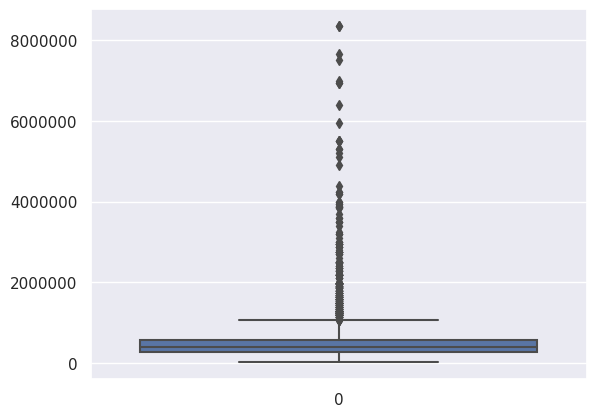

In [28]:
sns.boxplot(housing_df["price"])
plt.ticklabel_format(style='plain', axis='y')
plt.show();

In [18]:
q1 = np.percentile(housing_df['price'], 25)
q3 = np.percentile(housing_df['price'], 75)
iqr = q3 - q1
max_outlier = q3 + 1.5*iqr
print(f"Max Outlier: {max_outlier}")
num_outliers = housing_df[housing_df['price'] > max_outlier].shape[0]
print(f"Percentage of outliers: {100*round(num_outliers/housing_df.shape[0], 2)}")

Max Outlier: 1062500.0
Percentage of outliers: 8.0


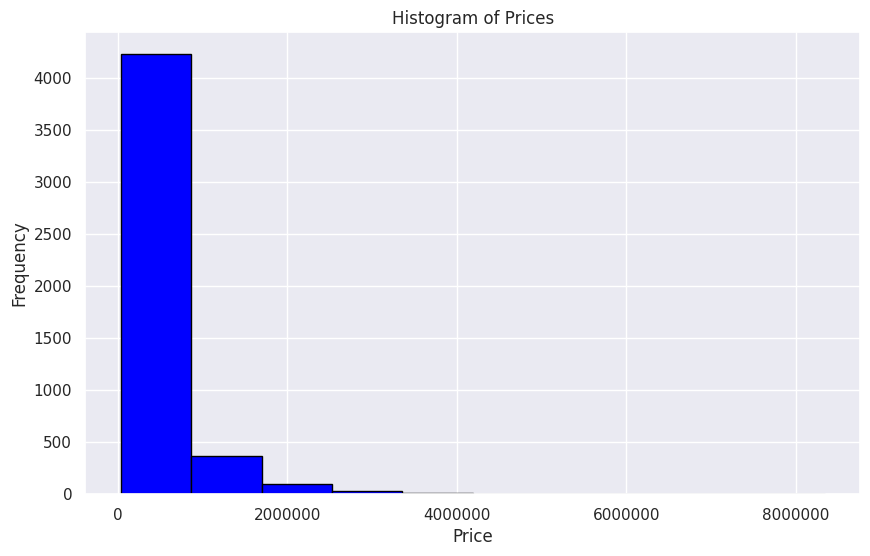

In [31]:

the_prices = housing_df["price"]

# Plot the hist
plt.figure(figsize=(10, 6))
plt.hist(the_prices, bins=10, color='blue', edgecolor='black')

# Add labels and title
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Prices')

# Set x-axis tick label format to non-scientific
plt.ticklabel_format(style='plain', axis='x')

plt.show()

In [117]:
# comparing various features to the target feature
#sns.pairplot(housing_df[['price', 'basement', 'bathrooms']], diag_kind='auto')
#plt.ticklabel_format(style='plain', axis='x')
#plt.show()

In [33]:
housing_df.T

,0,1,2,3,4,5,6,7,8,9,...,4760,4761,4762,4763,4764,4765,4766,4767,4768,4769
as_built_plan,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,0.0,0.0,...,NaN,NaN,0.0,0.0,1.0,1.0,NaN,0.0,0.0,0.0
available_as_of,After signing the deed,After signing the deed,After signing the deed,NaN,After signing the deed,After signing the deed,Depending on the tenant,Depending on the tenant,After signing the deed,After signing the deed,...,After signing the deed,After signing the deed,NaN,Immediately,NaN,After signing the deed,After signing the deed,NaN,To be defined,NaN
basement,1.0,1.0,1.0,NaN,NaN,1.0,1.0,1.0,1.0,NaN,...,1.0,NaN,1.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN
bathrooms,1.0,1.0,3.0,3.0,NaN,1.0,2.0,2.0,1.0,2.0,...,1.0,3.0,5.0,2.0,3.0,2.0,2.0,5.0,2.0,2.0
bedroom_1_surface,12.0,15.0,22.0,33.0,19.0,13.0,15.0,15.0,NaN,17.0,...,NaN,NaN,NaN,NaN,NaN,11.0,25.0,NaN,NaN,NaN
bedroom_2_surface,10.0,11.0,22.0,30.0,NaN,9.0,15.0,15.0,NaN,16.0,...,NaN,NaN,NaN,NaN,NaN,14.0,20.0,NaN,NaN,NaN
bedroom_3_surface,10.0,11.0,22.0,23.0,NaN,NaN,NaN,NaN,NaN,15.0,...,NaN,NaN,NaN,NaN,NaN,15.0,18.0,NaN,NaN,NaN
bedrooms,3.0,4.0,5.0,5.0,1.0,2.0,2.0,2.0,4.0,6.0,...,5.0,4.0,9.0,4.0,6.0,6.0,6.0,9.0,3.0,4.0
building_condition,Good,Good,As new,As new,Just renovated,As new,Good,Good,As new,Good,...,To be done up,Good,Good,Just renovated,Just renovated,Good,To be done up,Good,Good,As new
co2_emission,9802.0,NaN,NaN,NaN,58.0,1029.0,71.0,71.0,NaN,103.0,...,NaN,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0


### Feature Engineering

In [37]:
# change 'energy_class' value C_B to C
housing_df['energy_class'] = np.where(housing_df['energy_class'] == 'C_B', 'C', housing_df['energy_class'])

In [38]:
# fix values in 'kitchen_type'
housing_df['kitchen_type'] = np.where(housing_df['kitchen_type'] == 'USA uninstalled', 'USA installed', housing_df['kitchen_type'])

In [39]:
housing_df["kitchen_type"].value_counts()

Installed             1734
Semi equipped          818
Hyper equipped         629
USA hyper equipped     297
Not installed          283
USA installed          155
USA semi equipped       31
Name: kitchen_type, dtype: int64

In [40]:
housing_df["city"].value_counts()

Seraing       193
Antwerpen     159
Gent          142
Liège         141
Huy           140
             ... 
Wijnegem        1
Seneffe         1
Herzele         1
Liedekerke      1
Zemst           1
Name: city, Length: 246, dtype: int64

In [41]:
housing_df["state"].value_counts()

Vlaams Gewest      2094
Région Wallonne    1946
Bruxelles           571
Waals Gewest         54
Wallonia             19
Flanders             17
Brussels              6
Brussel               2
Région Flamande       1
Capellen              1
Name: state, dtype: int64

In [42]:
# fix values in 'state'
housing_df['state'] = np.where(housing_df['state'] == 'Région Wallonne', 'Wallonia', housing_df['state'])
housing_df['state'] = np.where(housing_df['state'] == 'Bruxelles', 'Brussel', housing_df['state'])
housing_df['state'] = np.where(housing_df['state'] == 'Brussels', 'Brussel', housing_df['state'])
housing_df['state'] = np.where(housing_df['state'] == 'Région Flamande', 'Flanders', housing_df['state'])

In [43]:
# Capelen state is not in Belgium, deleted the row
housing_df = housing_df[~(housing_df["state"] == "Capellen")]

In [44]:
housing_df["state"].value_counts()

Vlaams Gewest    2094
Wallonia         1965
Brussel           579
Waals Gewest       54
Flanders           18
Name: state, dtype: int64

In [45]:
# still trying to fix the states - not sure of waals geweest
housing_df[housing_df["state"] == "Waals Gewest"]

#checked few cities in waals geweest and it seems its still Wallonia
housing_df['state'] = np.where(housing_df['state'] == 'Waals Gewest', 'Wallonia', housing_df['state'])

<ipython-input-45-b2896f8a109a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_df['state'] = np.where(housing_df['state'] == 'Waals Gewest', 'Wallonia', housing_df['state'])


In [46]:
# will do same for Vlaams Gewest
housing_df[housing_df["state"] == "Waals Gewest"]
housing_df['state'] = np.where(housing_df['state'] == 'Vlaams Gewest', 'Flanders', housing_df['state'])

<ipython-input-46-c7977954ddcc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_df['state'] = np.where(housing_df['state'] == 'Vlaams Gewest', 'Flanders', housing_df['state'])


# Modelling

## Model-Driven EDA
  - Take care of Null Values
  - Convert non numeric to numeric


In [47]:
housing_df.isna().sum()

as_built_plan                                     2371
available_as_of                                    854
basement                                          2680
bathrooms                                          246
bedroom_1_surface                                 1602
bedroom_2_surface                                 1659
bedroom_3_surface                                 2141
bedrooms                                            30
building_condition                                 283
co2_emission                                      2826
cadastral_income                                  1073
connection_to_sewer_network                       2732
construction_year                                 1317
covered_parking_spaces                            2043
dining_room                                       3419
double_glazing                                     649
energy_class                                         0
external_reference                                 432
flood_zone

In [48]:
housing_df.head(5).T

,0,1,2,3,4
as_built_plan,0.0,0.0,NaN,0.0,0.0
available_as_of,After signing the deed,After signing the deed,After signing the deed,NaN,After signing the deed
basement,1.0,1.0,1.0,NaN,NaN
bathrooms,1.0,1.0,3.0,3.0,NaN
bedroom_1_surface,12.0,15.0,22.0,33.0,19.0
bedroom_2_surface,10.0,11.0,22.0,30.0,NaN
bedroom_3_surface,10.0,11.0,22.0,23.0,NaN
bedrooms,3.0,4.0,5.0,5.0,1.0
building_condition,Good,Good,As new,As new,Just renovated
co2_emission,9802.0,NaN,NaN,NaN,58.0


In [49]:
# trying to fill missing lat and lng
rows_with_null = housing_df[housing_df["lat"].isnull()]
rows_with_null[["housenumber","street", "city", "postal", "state", "lat", "lng"]]

# found out all possible info I can use to fill missing lat and lng is also missing
# Then I decided to drop such columns

,housenumber,street,city,postal,state,lat,lng
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131,NaN,NaN,NaN,NaN,NaN,NaN,NaN
597,NaN,NaN,NaN,NaN,NaN,NaN,NaN
611,NaN,NaN,NaN,NaN,NaN,NaN,NaN
822,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1283,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1751,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1754,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2208,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2252,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
# Then I decided to remove such columns
housing_df = housing_df[~housing_df["lat"].isnull()]

In [51]:
housing_df.isna().sum()

as_built_plan                                     2340
available_as_of                                    850
basement                                          2655
bathrooms                                          243
bedroom_1_surface                                 1590
bedroom_2_surface                                 1647
bedroom_3_surface                                 2127
bedrooms                                            30
building_condition                                 283
co2_emission                                      2802
cadastral_income                                  1068
connection_to_sewer_network                       2724
construction_year                                 1311
covered_parking_spaces                            2018
dining_room                                       3400
double_glazing                                     649
energy_class                                         0
external_reference                                 399
flood_zone

In [52]:
# Convert [postal, lat, lng] features to string(object)
# p-iter task

housing_df["postal"] = housing_df["postal"].astype(str)
housing_df["lng"] = housing_df["lng"].astype(str)
housing_df["lat"] = housing_df["lat"].astype(str)
housing_df.dtypes

as_built_plan                                     float64
available_as_of                                    object
basement                                          float64
bathrooms                                         float64
bedroom_1_surface                                 float64
bedroom_2_surface                                 float64
bedroom_3_surface                                 float64
bedrooms                                          float64
building_condition                                 object
co2_emission                                      float64
cadastral_income                                  float64
connection_to_sewer_network                       float64
construction_year                                 float64
covered_parking_spaces                            float64
dining_room                                       float64
double_glazing                                    float64
energy_class                                       object
external_refer

### Convert strings to categories

In [53]:
from pandas.api.types import is_string_dtype as is_str

In [54]:
display(is_str(housing_df["available_as_of"]))
display(is_str(housing_df["bathrooms"]))

True

False

In [55]:
is_str(housing_df["bathrooms"])

False

In [56]:
# find columns with string dtypes
for label, content in housing_df.items():
  if is_str(content):
    print(label)

available_as_of
building_condition
energy_class
external_reference
heating_type
kitchen_type
latest_land_use_designation
reference_number_of_the_epc_report
surroundings_type
website
housenumber
street
city
postal
state
lat
lng


In [57]:
# Turn string values into category

# loop through df
for label, content in housing_df.items():
  # using the pd api types lib - check if col is string
  if is_str(content):
    # if col is string, convert the col to category
    housing_df[label] = content.astype("category").cat.as_ordered()

In [58]:
# Strings now turned into categories
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4719 entries, 0 to 4769
Data columns (total 54 columns):
 #   Column                                          Non-Null Count  Dtype   
---  ------                                          --------------  -----   
 0   as_built_plan                                   2379 non-null   float64 
 1   available_as_of                                 3869 non-null   category
 2   basement                                        2064 non-null   float64 
 3   bathrooms                                       4476 non-null   float64 
 4   bedroom_1_surface                               3129 non-null   float64 
 5   bedroom_2_surface                               3072 non-null   float64 
 6   bedroom_3_surface                               2592 non-null   float64 
 7   bedrooms                                        4689 non-null   float64 
 8   building_condition                              4436 non-null   category
 9   co2_emission                  

In [59]:
housing_df.state.cat.categories
# Under the hood, pandas is treating the categorical columns as as numbers(codes)

Index(['Brussel', 'Flanders', 'Wallonia'], dtype='object')

In [60]:
# To access the cat codes
housing_df.state.cat.codes

0       1
1       1
2       1
3       1
4       2
       ..
4765    1
4766    1
4767    2
4768    1
4769    2
Length: 4719, dtype: int8

### After converting strings to categories, we can now deal with missing data

In [61]:
# Check missing data
housing_df.isna().sum()

as_built_plan                                     2340
available_as_of                                    850
basement                                          2655
bathrooms                                          243
bedroom_1_surface                                 1590
bedroom_2_surface                                 1647
bedroom_3_surface                                 2127
bedrooms                                            30
building_condition                                 283
co2_emission                                      2802
cadastral_income                                  1068
connection_to_sewer_network                       2724
construction_year                                 1311
covered_parking_spaces                            2018
dining_room                                       3400
double_glazing                                     649
energy_class                                         0
external_reference                                 399
flood_zone

In [62]:
# Check ratio of missing data
housing_df.isna().sum()/len(housing_df)

as_built_plan                                     0.495868
available_as_of                                   0.180123
basement                                          0.562619
bathrooms                                         0.051494
bedroom_1_surface                                 0.336936
bedroom_2_surface                                 0.349015
bedroom_3_surface                                 0.450731
bedrooms                                          0.006357
building_condition                                0.059970
co2_emission                                      0.593770
cadastral_income                                  0.226319
connection_to_sewer_network                       0.577241
construction_year                                 0.277813
covered_parking_spaces                            0.427633
dining_room                                       0.720492
double_glazing                                    0.137529
energy_class                                      0.0000

### Save preprocessed data

In [63]:
# Export housing_df
housing_df.to_csv("housing-df-processed1", index=False)

### Load preprocessed data

In [64]:
df = pd.read_csv("housing-df-processed1", low_memory=False)
df.shape

(4719, 54)

In [65]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,4709,4710,4711,4712,4713,4714,4715,4716,4717,4718
as_built_plan,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,0.0,0.0,...,NaN,NaN,0.0,0.0,1.0,1.0,NaN,0.0,0.0,0.0
available_as_of,After signing the deed,After signing the deed,After signing the deed,NaN,After signing the deed,After signing the deed,Depending on the tenant,Depending on the tenant,After signing the deed,After signing the deed,...,After signing the deed,After signing the deed,NaN,Immediately,NaN,After signing the deed,After signing the deed,NaN,To be defined,NaN
basement,1.0,1.0,1.0,NaN,NaN,1.0,1.0,1.0,1.0,NaN,...,1.0,NaN,1.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN
bathrooms,1.0,1.0,3.0,3.0,NaN,1.0,2.0,2.0,1.0,2.0,...,1.0,3.0,5.0,2.0,3.0,2.0,2.0,5.0,2.0,2.0
bedroom_1_surface,12.0,15.0,22.0,33.0,19.0,13.0,15.0,15.0,NaN,17.0,...,NaN,NaN,NaN,NaN,NaN,11.0,25.0,NaN,NaN,NaN
bedroom_2_surface,10.0,11.0,22.0,30.0,NaN,9.0,15.0,15.0,NaN,16.0,...,NaN,NaN,NaN,NaN,NaN,14.0,20.0,NaN,NaN,NaN
bedroom_3_surface,10.0,11.0,22.0,23.0,NaN,NaN,NaN,NaN,NaN,15.0,...,NaN,NaN,NaN,NaN,NaN,15.0,18.0,NaN,NaN,NaN
bedrooms,3.0,4.0,5.0,5.0,1.0,2.0,2.0,2.0,4.0,6.0,...,5.0,4.0,9.0,4.0,6.0,6.0,6.0,9.0,3.0,4.0
building_condition,Good,Good,As new,As new,Just renovated,As new,Good,Good,As new,Good,...,To be done up,Good,Good,Just renovated,Just renovated,Good,To be done up,Good,Good,As new
co2_emission,9802.0,NaN,NaN,NaN,58.0,1029.0,71.0,71.0,NaN,103.0,...,NaN,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0


### Fill Missing Values - Numeric

In [66]:
from pandas.api.types import is_numeric_dtype as is_num

In [67]:
# find columns with numeric dtypes
num_col_list = []
for label, content in df.items():
  if is_num(content):
    print(label)
    num_col_list.append(label)

as_built_plan
basement
bathrooms
bedroom_1_surface
bedroom_2_surface
bedroom_3_surface
bedrooms
co2_emission
cadastral_income
connection_to_sewer_network
construction_year
covered_parking_spaces
dining_room
double_glazing
flood_zone_type
furnished
garden_surface
gas_water__electricity
kitchen_surface
living_area
living_room_surface
number_of_frontages
office
outdoor_parking_spaces
planning_permission_obtained
possible_priority_purchase_right
primary_energy_consumption
proceedings_for_breach_of_planning_regulations
street_frontage_width
subdivision_permit
surface_of_the_plot
tv_cable
tenement_building
toilets
width_of_the_lot_on_the_street
yearly_theoretical_total_energy_consumption
postal
lat
lng
price


In [68]:
# since we have 14 non numeric columns, it is right that we have 40 numeric columns
# since df has 54 columns in total
len(num_col_list)

40

In [69]:
# check for which numeric cols have missing values
# fill them with the median

# loop through df
for label, content in df.items():
  # check if the col contains int values
  if is_num(content):
    # check if null values exist in such cols
    if pd.isnull(content).sum():
      # Fill numeric value with median
      df[label] = content.fillna(content.median())

In [70]:
# loop through df
for label, content in df.items():
  # check if the col contains int values
  if is_num(content):
    # check if null values exist in such cols
    if pd.isnull(content).sum():
      print(label)

# Now we get no result because we have filled the null values

In [71]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,4709,4710,4711,4712,4713,4714,4715,4716,4717,4718
as_built_plan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
available_as_of,After signing the deed,After signing the deed,After signing the deed,NaN,After signing the deed,After signing the deed,Depending on the tenant,Depending on the tenant,After signing the deed,After signing the deed,...,After signing the deed,After signing the deed,NaN,Immediately,NaN,After signing the deed,After signing the deed,NaN,To be defined,NaN
basement,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
bathrooms,1.0,1.0,3.0,3.0,1.0,1.0,2.0,2.0,1.0,2.0,...,1.0,3.0,5.0,2.0,3.0,2.0,2.0,5.0,2.0,2.0
bedroom_1_surface,12.0,15.0,22.0,33.0,19.0,13.0,15.0,15.0,16.0,17.0,...,16.0,16.0,16.0,16.0,16.0,11.0,25.0,16.0,16.0,16.0
bedroom_2_surface,10.0,11.0,22.0,30.0,14.0,9.0,15.0,15.0,14.0,16.0,...,14.0,14.0,14.0,14.0,14.0,14.0,20.0,14.0,14.0,14.0
bedroom_3_surface,10.0,11.0,22.0,23.0,14.0,14.0,14.0,14.0,14.0,15.0,...,14.0,14.0,14.0,14.0,14.0,15.0,18.0,14.0,14.0,14.0
bedrooms,3.0,4.0,5.0,5.0,1.0,2.0,2.0,2.0,4.0,6.0,...,5.0,4.0,9.0,4.0,6.0,6.0,6.0,9.0,3.0,4.0
building_condition,Good,Good,As new,As new,Just renovated,As new,Good,Good,As new,Good,...,To be done up,Good,Good,Just renovated,Just renovated,Good,To be done up,Good,Good,As new
co2_emission,9802.0,76.0,76.0,76.0,58.0,1029.0,71.0,71.0,76.0,103.0,...,76.0,80.0,76.0,76.0,76.0,76.0,76.0,76.0,76.0,2.0


### Fill Missing Values - categorical/non-num

In [72]:
df.isna().sum(), "Data Types", df.dtypes

(as_built_plan                                        0
 available_as_of                                    850
 basement                                             0
 bathrooms                                            0
 bedroom_1_surface                                    0
 bedroom_2_surface                                    0
 bedroom_3_surface                                    0
 bedrooms                                             0
 building_condition                                 283
 co2_emission                                         0
 cadastral_income                                     0
 connection_to_sewer_network                          0
 construction_year                                    0
 covered_parking_spaces                               0
 dining_room                                          0
 double_glazing                                       0
 energy_class                                         0
 external_reference                             

In [73]:
for label, content in df.items():
  if not is_num(content):
    print(label)

available_as_of
building_condition
energy_class
external_reference
heating_type
kitchen_type
latest_land_use_designation
reference_number_of_the_epc_report
surroundings_type
website
housenumber
street
city
state


In [74]:
# data was saved and reloaded and I noticed datatype changed from categories
# back to object as soon as I reloaded the data
# But it seems cat attributes are still accessible

In [75]:
# checking out the codes we got due to converting string to categories

pd.Categorical(df.state)

['Flanders', 'Flanders', 'Flanders', 'Flanders', 'Wallonia', ..., 'Flanders', 'Flanders', 'Wallonia', 'Flanders', 'Wallonia']
Length: 4719
Categories (3, object): ['Brussel', 'Flanders', 'Wallonia']

In [76]:
# Categorical missing values are represented with -1
# we will deal with this later below
pd.Categorical(df.available_as_of).codes

array([ 0,  0,  0, ..., -1,  4, -1], dtype=int8)

In [77]:
# Turn categorical features to numbers and fill missing
for label, content in df.items():
  if not is_num(content):
    # Turn categories into numbers(cat-code) and add +1
    # +1 is done to change missing values to 0. Missing categorical values is -1 by default
    df[label] = pd.Categorical(content).codes + 1

In [78]:
pd.Categorical(df.available_as_of).codes
# cat missing values fixed

array([1, 1, 1, ..., 0, 5, 0], dtype=int8)

In [79]:
df.info()
# all features now have numeric dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4719 entries, 0 to 4718
Data columns (total 54 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   as_built_plan                                   4719 non-null   float64
 1   available_as_of                                 4719 non-null   int8   
 2   basement                                        4719 non-null   float64
 3   bathrooms                                       4719 non-null   float64
 4   bedroom_1_surface                               4719 non-null   float64
 5   bedroom_2_surface                               4719 non-null   float64
 6   bedroom_3_surface                               4719 non-null   float64
 7   bedrooms                                        4719 non-null   float64
 8   building_condition                              4719 non-null   int8   
 9   co2_emission                             

In [80]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,4709,4710,4711,4712,4713,4714,4715,4716,4717,4718
as_built_plan,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
available_as_of,1.000000,1.000000,1.000000,0.000000e+00,1.000000,1.000000,3.000000,3.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,4.000000,0.000000,1.000000,1.000000,0.000000,5.000000,0.000000
basement,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
bathrooms,1.000000,1.000000,3.000000,3.000000e+00,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,...,1.000000,3.000000,5.000000,2.000000,3.000000,2.000000,2.000000,5.000000,2.000000,2.000000
bedroom_1_surface,12.000000,15.000000,22.000000,3.300000e+01,19.000000,13.000000,15.000000,15.000000,16.000000,17.000000,...,16.000000,16.000000,16.000000,16.000000,16.000000,11.000000,25.000000,16.000000,16.000000,16.000000
bedroom_2_surface,10.000000,11.000000,22.000000,3.000000e+01,14.000000,9.000000,15.000000,15.000000,14.000000,16.000000,...,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,20.000000,14.000000,14.000000,14.000000
bedroom_3_surface,10.000000,11.000000,22.000000,2.300000e+01,14.000000,14.000000,14.000000,14.000000,14.000000,15.000000,...,14.000000,14.000000,14.000000,14.000000,14.000000,15.000000,18.000000,14.000000,14.000000,14.000000
bedrooms,3.000000,4.000000,5.000000,5.000000e+00,1.000000,2.000000,2.000000,2.000000,4.000000,6.000000,...,5.000000,4.000000,9.000000,4.000000,6.000000,6.000000,6.000000,9.000000,3.000000,4.000000
building_condition,2.000000,2.000000,1.000000,1.000000e+00,3.000000,1.000000,2.000000,2.000000,1.000000,2.000000,...,4.000000,2.000000,2.000000,3.000000,3.000000,2.000000,4.000000,2.000000,2.000000,1.000000
co2_emission,9802.000000,76.000000,76.000000,7.600000e+01,58.000000,1029.000000,71.000000,71.000000,76.000000,103.000000,...,76.000000,80.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,2.000000


In [81]:
df.isna().sum()

as_built_plan                                     0
available_as_of                                   0
basement                                          0
bathrooms                                         0
bedroom_1_surface                                 0
bedroom_2_surface                                 0
bedroom_3_surface                                 0
bedrooms                                          0
building_condition                                0
co2_emission                                      0
cadastral_income                                  0
connection_to_sewer_network                       0
construction_year                                 0
covered_parking_spaces                            0
dining_room                                       0
double_glazing                                    0
energy_class                                      0
external_reference                                0
flood_zone_type                                   0
furnished   

# Fit/Evaluate/Tune ML Model
We can now fit a model because our data is fully numeric and contains no missing data.

In [82]:
df.head(20)

,as_built_plan,available_as_of,basement,bathrooms,bedroom_1_surface,bedroom_2_surface,bedroom_3_surface,bedrooms,building_condition,co2_emission,...,width_of_the_lot_on_the_street,yearly_theoretical_total_energy_consumption,housenumber,street,city,postal,state,lat,lng,price
0,0.0,1,1.0,1.0,12.0,10.0,10.0,3.0,2,9802.0,...,11.0,55603.5,128,461,184,9600.0,2,50.743367,3.601306,275000
1,0.0,1,1.0,1.0,15.0,11.0,11.0,4.0,2,76.0,...,11.0,55603.5,179,493,236,8750.0,2,51.042146,3.302600,430000
2,0.0,1,1.0,3.0,22.0,22.0,22.0,5.0,1,76.0,...,6.0,55603.5,54,259,8,2018.0,2,51.205030,4.410943,949000
3,0.0,0,1.0,3.0,33.0,30.0,23.0,5.0,1,76.0,...,19.0,55603.5,208,276,39,8000.0,2,51.206826,3.219186,2200000
4,0.0,1,1.0,1.0,19.0,14.0,14.0,1.0,3,58.0,...,5.0,24263.0,51,411,228,1301.0,3,50.717062,4.577550,195000
5,0.0,1,1.0,1.0,13.0,9.0,14.0,2.0,1,1029.0,...,11.0,23142.0,51,126,36,4260.0,3,50.636098,5.156102,260000
6,0.0,3,1.0,2.0,15.0,15.0,14.0,2.0,2,71.0,...,7.0,15060.0,167,373,104,6990.0,3,50.265875,5.451936,275000
7,0.0,3,1.0,2.0,15.0,15.0,14.0,2.0,2,71.0,...,7.0,15060.0,167,373,104,6990.0,3,50.265875,5.451936,275000
8,0.0,1,1.0,1.0,16.0,14.0,14.0,4.0,1,76.0,...,11.0,81227.0,186,85,162,9860.0,2,50.937065,3.769555,480000
9,0.0,1,1.0,2.0,17.0,16.0,15.0,6.0,2,103.0,...,45.0,112946.0,206,129,143,6900.0,3,50.231363,5.350163,425000


### Split data

In [83]:
# We need to separate our Features from our target
X = df.drop(columns="price")
y = df["price"]

In [84]:
# We need to split our data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Prep function for evaluation

In [85]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_squared_log_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_log_error

In [86]:
# Create function to evaluate model on a few diff levels
# OVERFITTING - our model is performing better on the test dataset

def show_scores(model):
  # Make predictions
  train_preds = model.predict(X_train)
  test_preds = model.predict(X_test)
  # Evaluations
  scores = {"Train MAE": mean_absolute_error(y_train, train_preds),
            "Test MAE": mean_absolute_error(y_test, test_preds),
            "Train MSE": mean_squared_error(y_train, train_preds),
            "Test MSE": mean_squared_error(y_test, test_preds),
            "Train RMSE": np.sqrt(mean_squared_error(y_train, train_preds)),
            "Test RMSE": np.sqrt(mean_squared_error(y_test, test_preds)),
            "Train MSLE": mean_squared_log_error(y_train, train_preds),
            "Test MSLE": mean_squared_log_error(y_test, test_preds),
            "Train RMSLE": np.sqrt(mean_squared_log_error(y_train, train_preds)),
            "Test RMSLE": np.sqrt(mean_squared_log_error(y_test, test_preds)),
            "Train MAPE": mean_absolute_percentage_error(y_train, train_preds),
            "Test MAPE": mean_absolute_percentage_error(y_test, test_preds),
            "Train R^2": r2_score(y_train, train_preds),
            "Test R^2": r2_score(y_test, test_preds),
            }

  metrics_df = pd.DataFrame(list(scores.items()), columns=['Metric', 'Value'])
  metrics_df['Value'] = metrics_df['Value'].apply(lambda x: format(x, '.6f'))

  return metrics_df

### Fit several models

In [87]:
# Random Forest algorithm
%%time
# instantiate model

# Set the random seed
np.random.seed(42)

model = RandomForestRegressor()
# Fit Model
model.fit(X_train, y_train)

CPU times: user 6.99 s, sys: 32.4 ms, total: 7.02 s
Wall time: 7.04 s


RandomForestRegressor()

In [88]:
show_scores(model)

,Metric,Value
0,Train MAE,43507.388914
1,Test MAE,124173.222701
2,Train MSE,9155406720.865572
3,Test MSE,100779313100.422791
4,Train RMSE,95683.889558
5,Test RMSE,317457.576851
6,Train MSLE,0.012320
7,Test MSLE,0.083390
8,Train RMSLE,0.110995
9,Test RMSLE,0.288773


In [89]:
# Random Forest achieved a score of 0.73

In [90]:
# KNN algorithm
%%time
# instantiate model-2

# Set the random seed
np.random.seed(42)

model2 = KNeighborsRegressor(n_neighbors=5)
# Fit Model
model2.fit(X_train, y_train)

CPU times: user 5.54 ms, sys: 1.12 ms, total: 6.66 ms
Wall time: 7.57 ms


KNeighborsRegressor()

In [91]:
show_scores(model2)

,Metric,Value
0,Train MAE,161595.495788
1,Test MAE,189326.627331
2,Train MSE,118858711335.087158
3,Test MSE,208482961697.325226
4,Train RMSE,344758.917702
5,Test RMSE,456599.344828
6,Train MSLE,0.130022
7,Test MSLE,0.196389
8,Train RMSLE,0.360586
9,Test RMSLE,0.443158


In [92]:
# Decision Tree Regressor
%%time
# instantiate model-3

# Set the random seed
np.random.seed(42)

model3 = DecisionTreeRegressor()

# Fit Model
model3.fit(X_train, y_train)

CPU times: user 149 ms, sys: 0 ns, total: 149 ms
Wall time: 174 ms


DecisionTreeRegressor()

In [93]:
show_scores(model3)

,Metric,Value
0,Train MAE,0.000000
1,Test MAE,179807.368644
2,Train MSE,0.000000
3,Test MSE,227874630199.084747
4,Train RMSE,0.000000
5,Test RMSE,477362.158323
6,Train MSLE,0.000000
7,Test MSLE,0.167135
8,Train RMSLE,0.000000
9,Test RMSLE,0.408821


#### Hyperparameter Tuning with RandomizedSearch CV

##### The RF Regressor performs better on the test data, so I will perform hyperparameter tuning on it.

In [94]:
# Create random forest grid
# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1.0, "sqrt", "auto"],
           "max_samples": [3020]}

In [95]:
# instantiate RF using the randomsearch cv
rscv_rf = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1, random_state=42),
                              param_distributions=rf_grid,
                              n_iter=20,
                              cv=5,
                              verbose=True)

In [96]:
# fit the randomized search CV model
%%time
rscv_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

CPU times: user 2min 10s, sys: 1.17 s, total: 2min 12s
Wall time: 1min 32s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1.0, 'sqrt',
                                                         'auto'],
                                        'max_samples': [3020],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [97]:
rscv_rf.score(X_train, y_train)

0.9572904567482219

In [98]:
show_scores(rscv_rf)

,Metric,Value
0,Train MAE,55710.738212
1,Test MAE,123716.715148
2,Train MSE,14073533531.934126
3,Test MSE,97105294169.993042
4,Train RMSE,118631.924590
5,Test RMSE,311617.223802
6,Train MSLE,0.019474
7,Test MSLE,0.084346
8,Train RMSLE,0.139549
9,Test RMSLE,0.290424


Quickly use pycaret to compare various regression algorithm performance

In [99]:
from pycaret.regression import *

In [100]:
reg_setup = setup(data=df, target='price', session_id=123)

# Compare regression models
compare_models()

,Description,Value
0,Session id,123
1,Target,price
2,Target type,Regression
3,Original data shape,"(4719, 54)"
4,Transformed data shape,"(4719, 54)"
5,Transformed train set shape,"(3303, 54)"
6,Transformed test set shape,"(1416, 54)"
7,Numeric features,53
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,117310.8636,72685116275.3073,262429.1728,0.7626,0.2860,0.2210,0.7120
et,Extra Trees Regressor,122250.5530,82000676184.7597,277464.5897,0.7359,0.2869,0.2330,2.5820
gbr,Gradient Boosting Regressor,129224.0282,76236125398.0839,270854.4849,0.7345,0.3079,0.2545,1.4200
rf,Random Forest Regressor,125298.7026,84013565297.2429,282246.9337,0.7217,0.2892,0.2351,5.2420
lightgbm,Light Gradient Boosting Machine,125517.7907,90886968327.8921,291950.2905,0.7107,0.2932,0.2281,1.1210
dt,Decision Tree Regressor,168525.1726,150188606176.3668,381553.3922,0.4851,0.3995,0.3117,0.0970
knn,K Neighbors Regressor,200989.8969,208213257971.4097,448411.1092,0.3210,0.4632,0.3889,0.0410
omp,Orthogonal Matching Pursuit,218859.6677,242062861994.1663,482844.2462,0.2570,0.5177,0.4766,0.0520
dummy,Dummy Regressor,300152.8310,321271046846.0453,558791.5685,-0.0039,0.7203,0.8038,0.0280
ada,AdaBoost Regressor,478860.4641,306550809422.4956,551443.9790,-0.0612,0.9571,1.5864,0.5980


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device='cpu', early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=-1,
             num_parallel_tree=None, random_state=123, ...)

### Using XGboost Regression Algorithm

In [101]:
# Define the XGBoost model
xgbst = XGBRegressor()
xgbst.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [102]:
show_scores(xgbst)

,Metric,Value
0,Train MAE,23186.670652
1,Test MAE,122815.385679
2,Train MSE,1032224893.459406
3,Test MSE,96892723118.285324
4,Train RMSE,32128.256932
5,Test RMSE,311275.959750
6,Train MSLE,0.007654
7,Test MSLE,0.084971
8,Train RMSLE,0.087489
9,Test RMSLE,0.291498


#### - Hyperperameter Tuning - Using RandomSearch CV on xgboost model

In [103]:
# Create hyperparameter grid
param_grid = {
    'learning_rate': np.linspace(0.01, 0.2, 10),
    'max_depth': range(3, 10),
    'min_child_weight': range(1, 6),
    'subsample': np.linspace(0.5, 1, 6),
    'colsample_bytree': np.linspace(0.5, 1, 6),
    'n_estimators': [100, 200, 300, 400, 500]
}

In [104]:
# Create the RandomizedSearchCV object
%%time
rscv_xgbst = RandomizedSearchCV(xgbst, param_distributions=param_grid, n_iter=20, scoring='neg_mean_squared_error', cv=5, random_state=42)

# Fit the model
rscv_xgbst.fit(X_train, y_train)

CPU times: user 5min 23s, sys: 1.61 s, total: 5min 24s
Wall time: 3min 17s


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                   param_distributions={'colsample_bytree': array([0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                                        'learning_rate': array([0.01      , 0.03111111, 0.05222222, 0.07333333, 0.09444444,
       0.11555556, 0.13666667, 0.15777778, 0.17888889, 0.2       ]),
                                        'max_depth': range(3, 10),
                                        'min_child_weight': range(1, 6),
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'subsample': array([0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
                   random_state=42, scoring='neg_mean_squared_error')

In [105]:
# Print the best hyperparameters
print("Best Hyperparameters:", rscv_xgbst.best_params_)

Best Hyperparameters: {'subsample': 0.9, 'n_estimators': 500, 'min_child_weight': 2, 'max_depth': 5, 'learning_rate': 0.1366666666666667, 'colsample_bytree': 0.8}


In [106]:
show_scores(rscv_xgbst)

,Metric,Value
0,Train MAE,15394.203218
1,Test MAE,113667.306623
2,Train MSE,468547590.627847
3,Test MSE,86166974293.192200
4,Train RMSE,21645.960146
5,Test RMSE,293542.116728
6,Train MSLE,0.003772
7,Test MSLE,0.072080
8,Train RMSLE,0.061414
9,Test RMSLE,0.268477


In [107]:
# Evaluate the model on the test set
test_preds = rscv_xgbst.predict(X_test)
pd.DataFrame(test_preds)

,0
0,566183.625000
1,284524.218750
2,239843.109375
3,385913.687500
4,235943.312500
...,...
939,324649.781250
940,304576.781250
941,500247.156250
942,274904.218750


#### Train Model with the best hyperparameters from Randomsearch CV to get the "Ideal Model"

In [108]:
rscv_xgbst.best_params_

{'subsample': 0.9,
 'n_estimators': 500,
 'min_child_weight': 2,
 'max_depth': 5,
 'learning_rate': 0.1366666666666667,
 'colsample_bytree': 0.8}

In [109]:
final_xgbst = XGBRegressor(subsample = 0.9,
                           n_estimators = 500,
                           min_child_weight = 2,
                           max_depth = 5,
                           learning_rate = 0.1366666666666667,
                           colsample_bytree = 0.8,
                           random_state = 42)

final_xgbst.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1366666666666667,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=2, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [110]:
show_scores(final_xgbst)

,Metric,Value
0,Train MAE,15244.849808
1,Test MAE,111712.134013
2,Train MSE,468621054.012481
3,Test MSE,80383364947.063400
4,Train RMSE,21647.657010
5,Test RMSE,283519.602404
6,Train MSLE,0.003851
7,Test MSLE,0.070718
8,Train RMSLE,0.062052
9,Test RMSLE,0.265929


In [111]:
# final_xgbst is the Ideal Model

# Feature Importance
  - How each cols contribute
  - What cols/attributes were really important to the prediction of the Target Variable(Price)

In [112]:
# Find feature importance of our - ideal model -
final_xgbst.feature_importances_

array([0.00056212, 0.00284875, 0.        , 0.10099934, 0.00362225,
       0.00397446, 0.00258116, 0.03639139, 0.00946225, 0.00387171,
       0.01918867, 0.00972538, 0.00525643, 0.0326185 , 0.        ,
       0.00117099, 0.00522964, 0.00287124, 0.00043713, 0.00248665,
       0.00784965, 0.00074897, 0.00232198, 0.00364587, 0.00528047,
       0.00809529, 0.08469234, 0.0031743 , 0.0201765 , 0.00058848,
       0.09851404, 0.        , 0.00078885, 0.00780965, 0.        ,
       0.00456563, 0.00118252, 0.0090067 , 0.02021883, 0.00291679,
       0.        , 0.03918415, 0.02927536, 0.01037189, 0.00516739,
       0.00313323, 0.00333124, 0.04690795, 0.01239677, 0.02720936,
       0.04192016, 0.24149545, 0.0147322 ], dtype=float32)

In [113]:
len(final_xgbst.feature_importances_)

53

In [114]:
X_train.shape
# col amount == len of feature importance

(3775, 53)

In [115]:
# Plot feature importance. First we create a DF from train data col and feat importance
pd.Series(final_xgbst.feature_importances_)
pd.Series(X_train.columns)

feature_imp_df = pd.concat([pd.Series(X_train.columns), pd.Series(final_xgbst.feature_importances_)], axis=1)
feature_imp_df

feature_imp_df.rename(columns={0: 'Features', 1: 'Importance'}, inplace=True)
feature_imp_df = feature_imp_df.sort_values(by=['Importance'], ascending=False)
feature_imp_df

,Features,Importance
51,lat,0.241495
3,bathrooms,0.100999
30,outdoor_parking_spaces,0.098514
26,living_area,0.084692
47,street,0.046908
50,state,0.041920
41,tenement_building,0.039184
7,bedrooms,0.036391
13,covered_parking_spaces,0.032618
42,toilets,0.029275


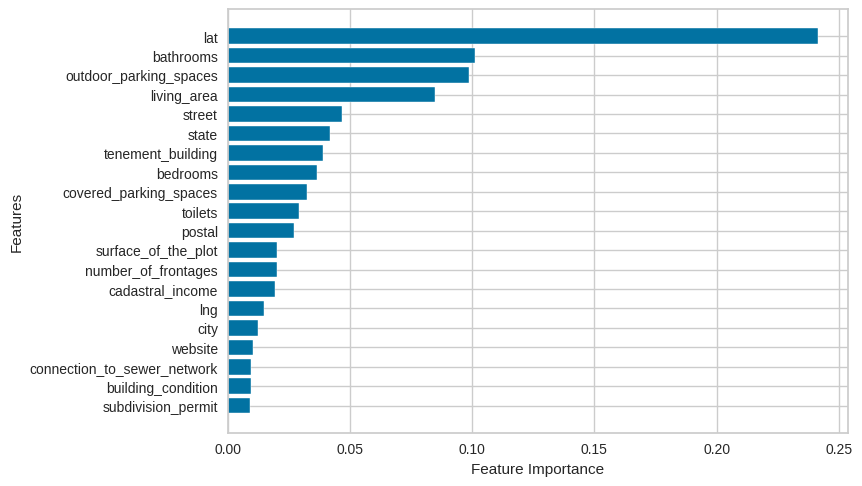

In [116]:
# plot h-bar
fig, ax = plt.subplots()
ax.barh(feature_imp_df["Features"][:20], feature_imp_df["Importance"][:20])
ax.set_ylabel("Features")
ax.set_xlabel("Feature Importance")
ax.invert_yaxis()
plt.show()

# Experimentation
  - What other Regression Models can we try + tuning
  - Does our important feature actually feel important. Can we find out using Domain Knowledge(Real Estate)
  - Will collecting more data improve our model